In [1]:
import matplotlib.pyplot as plt
from matplotlib import font_manager
import numpy as np
import pandas as pd
#한글 폰트 설정
path = 'C:\\Windows\\Fonts\\HYKANM.TTF'
font = font_manager.FontProperties(fname=path).get_name()
plt.rc('font',family=font)

In [9]:
file_name = "./연령별인구현황.csv"
data = pd.read_csv(file_name,encoding="EUC-KR")
data.head()

,행정구역,2024년11월_계_총인구수,2024년11월_계_연령구간인구수,2024년11월_계_0~9세,2024년11월_계_10~19세,2024년11월_계_20~29세,2024년11월_계_30~39세,2024년11월_계_40~49세,2024년11월_계_50~59세,2024년11월_계_60~69세,2024년11월_계_70~79세,2024년11월_계_80~89세,2024년11월_계_90~99세,2024년11월_계_100세 이상
0,서울특별시 (1100000000),"9,335,495","9,335,495","485,522","721,716","1,312,745","1,440,604","1,387,689","1,487,634","1,324,449","770,079","354,527","49,049","1,481"
1,서울특별시 종로구 (1111000000),"138,577","138,577","5,551","9,430","21,060","19,695","18,598","23,413","21,016","11,862","6,815","1,097",40
2,서울특별시 종로구 청운효자동(1111051500),"11,072","11,072",549,"1,016","1,329","1,519","1,774","1,890","1,433",906,561,92,3
3,서울특별시 종로구 사직동(1111053000),"9,011","9,011",418,626,"1,041","1,438","1,413","1,459","1,279",715,518,97,7
4,서울특별시 종로구 삼청동(1111054000),"2,220","2,220",83,157,239,289,308,333,381,250,149,31,0


In [3]:
region_name = input("검색하고 싶은 지역명을 입력하세요 : ")
data = data.rename(columns={"행정구역":"지역명"})
age_columns = [col for col in data.columns if "세" in col ]

검색하고 싶은 지역명을 입력하세요 :  은평구


In [4]:
# 숫자로 변환
for col in age_columns:
    data[col] = data[col].str.replace(",","").astype(int)

['2024년11월_계_0~9세',
 '2024년11월_계_10~19세',
 '2024년11월_계_20~29세',
 '2024년11월_계_30~39세',
 '2024년11월_계_40~49세',
 '2024년11월_계_50~59세',
 '2024년11월_계_60~69세',
 '2024년11월_계_70~79세',
 '2024년11월_계_80~89세',
 '2024년11월_계_90~99세',
 '2024년11월_계_100세 이상']

In [4]:
# 필터링 / contains() : 문자열 데이털 필터링, 특정 패턴 찾을 때 사용
# 옵션 1. na : 결측값 포함/미포함 여부 결정(기본값 True, 결측값 포함)
# 옵션 2. case : 영문일 경우에만 사용, 영문의 대소문자를 구분(기본값 True, 대소문자 구분)
region_data = data[data["지역명"].str.contains(region_name,na=False)]

if region_data.empty:
    print(f"{region_name}의 지역은 데이터가 존재하지 않습니다.")


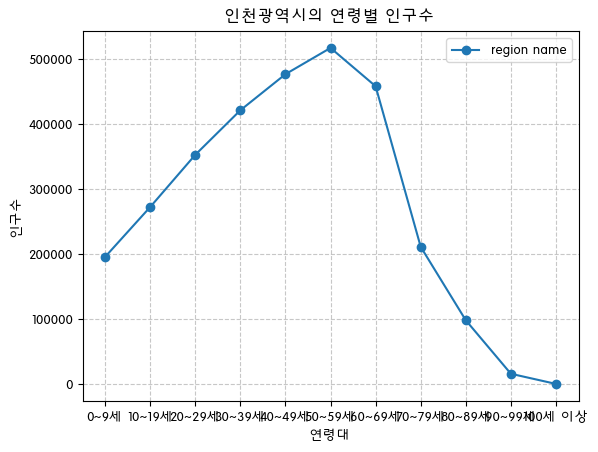

In [5]:
# 데이터 추출
age_groups = [ col.split("_계_")[1] for col in age_columns ]
result = region_data[age_columns].iloc[0].values

# 그래프 그리기
plt.plot(age_groups,result,marker='o',label='region name')
plt.title(f"{region_name}의 연령별 인구수")
plt.xlabel("연령대")
plt.ylabel("인구수")
plt.grid(True,linestyle='--',alpha=0.7)
plt.legend()